In [1]:
# for presentation purposes
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

# visualize 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import model

# working with dates
from datetime import datetime

# to evaluated performance using rmse
from sklearn.metrics import mean_squared_error
from math import sqrt 

# for tsa 
import statsmodels.api as sm

# holt's linear trend model. 
from statsmodels.tsa.api import Holt

In [2]:
plt.rc('figure', figsize=(13, 6))
plt.rc('axes.spines', top=False, right=False)
plt.rc('font', size=13)

In [3]:
# Read in the data - Global Average Absolute Sea Level Change
df = pd.read_csv('sea_levels_2015.csv',index_col=0)

In [4]:
df.tail()

,GMSL,GMSL uncertainty
Time,,
2013-08-15,71.6,8.8
2013-09-15,68.8,8.8
2013-10-15,66.4,8.9
2013-11-15,59.7,9.0
2013-12-15,58.5,9.0


In [5]:
df.describe

<bound method NDFrame.describe of              GMSL  GMSL uncertainty
Time                               
1880-01-15 -183.0              24.2
1880-02-15 -171.1              24.2
1880-03-15 -164.3              24.2
1880-04-15 -158.2              24.2
1880-05-15 -158.7              24.2
...           ...               ...
2013-08-15   71.6               8.8
2013-09-15   68.8               8.8
2013-10-15   66.4               8.9
2013-11-15   59.7               9.0
2013-12-15   58.5               9.0

[1608 rows x 2 columns]>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1608 entries, 1880-01-15 to 2013-12-15
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   GMSL              1608 non-null   float64
 1   GMSL uncertainty  1608 non-null   float64
dtypes: float64(2)
memory usage: 37.7+ KB


In [7]:
df.isna().sum()

GMSL                0
GMSL uncertainty    0
dtype: int64

In [8]:
df.dtypes

GMSL                float64
GMSL uncertainty    float64
dtype: object

In [9]:
df.index.min(), df.index.max()

('1880-01-15', '2013-12-15')

(array([ 44., 210., 340., 193., 145., 207., 201., 128.,  82.,  58.]),
 array([-184.5 , -157.81, -131.12, -104.43,  -77.74,  -51.05,  -24.36,
           2.33,   29.02,   55.71,   82.4 ]),
 <BarContainer object of 10 artists>)

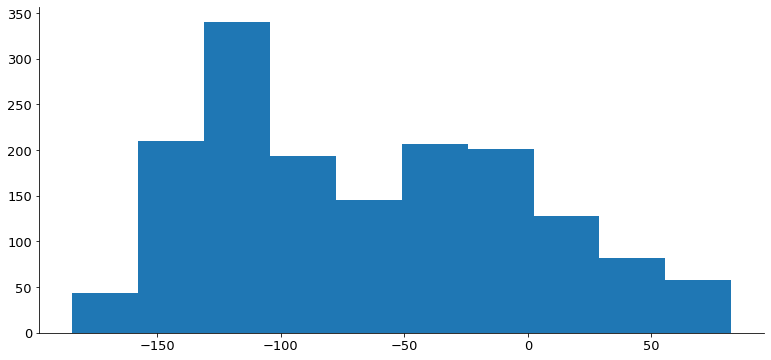

In [11]:
plt.hist(df['GMSL'])

(array([745.,  56.,  87., 263., 145.,  21.,  51.,  37., 155.,  48.]),
 array([ 6.2,  8. ,  9.8, 11.6, 13.4, 15.2, 17. , 18.8, 20.6, 22.4, 24.2]),
 <BarContainer object of 10 artists>)

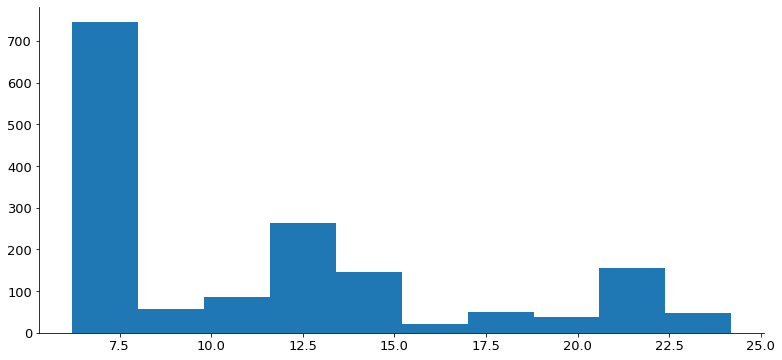

In [12]:
plt.hist(df['GMSL uncertainty'])

<AxesSubplot:xlabel='Time'>

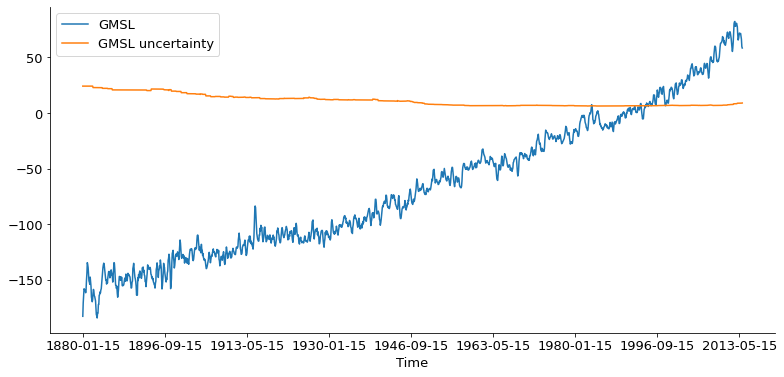

In [10]:
df.plot()

In [24]:
df['error_percent'] = abs((df['GMSL uncertainty'] / df['GMSL']) * 100)

In [25]:
df

,GMSL,GMSL uncertainty,error_percent
Time,,,
1880-01-15,-183.0,24.2,13.224044
1880-02-15,-171.1,24.2,14.143776
1880-03-15,-164.3,24.2,14.729154
1880-04-15,-158.2,24.2,15.297092
1880-05-15,-158.7,24.2,15.248897
...,...,...,...
2013-08-15,71.6,8.8,12.290503
2013-09-15,68.8,8.8,12.790698
2013-10-15,66.4,8.9,13.403614


Sea levels show a steadily upward trend since 1880.

In [27]:
# convert mm to inches
df['GMSL'] = df['GMSL'] / 25.4

In [28]:
df

,GMSL,GMSL uncertainty,error_percent
Time,,,
1880-01-15,-7.204724,24.2,13.224044
1880-02-15,-6.736220,24.2,14.143776
1880-03-15,-6.468504,24.2,14.729154
1880-04-15,-6.228346,24.2,15.297092
1880-05-15,-6.248031,24.2,15.248897
...,...,...,...
2013-08-15,2.818898,8.8,12.290503
2013-09-15,2.708661,8.8,12.790698
2013-10-15,2.614173,8.9,13.403614


In [29]:
df['GMSL uncertainty'] = df['GMSL uncertainty'] / 25.4

In [30]:
df

,GMSL,GMSL uncertainty,error_percent
Time,,,
1880-01-15,-7.204724,0.952756,13.224044
1880-02-15,-6.736220,0.952756,14.143776
1880-03-15,-6.468504,0.952756,14.729154
1880-04-15,-6.228346,0.952756,15.297092
1880-05-15,-6.248031,0.952756,15.248897
...,...,...,...
2013-08-15,2.818898,0.346457,12.290503
2013-09-15,2.708661,0.346457,12.790698
2013-10-15,2.614173,0.350394,13.403614


<AxesSubplot:xlabel='Time'>

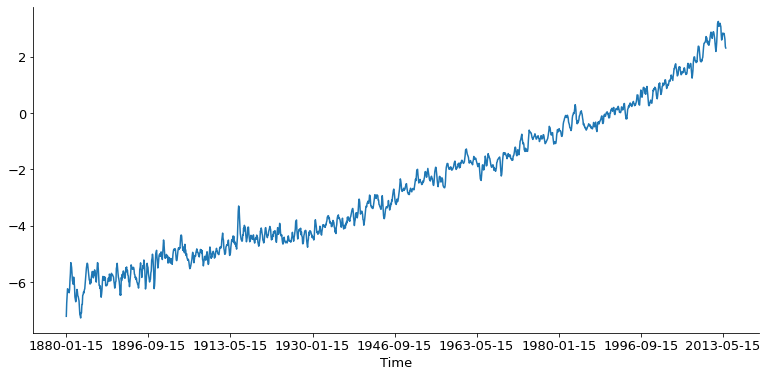

In [32]:
df['GMSL'].plot()